In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from sklearn.metrics import r2_score

def zscore(x):
    return (x-np.mean(x))/np.std(x)

In [22]:
# PNA + PNC + PV + SOM
2845 + 1155 + 466 + 256

4722

In [28]:
#2845 / 4722 # 60.2%
#1155 / 4722 # 24.5%
#466 / 4722 # 9.9%
#256 / 4722 # 5.4%

0.05421431596781025

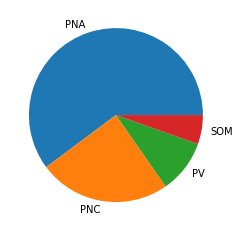

In [34]:
labels = 'PNA', 'PNC', 'PV', 'SOM'
sizes = [60.2, 24.5, 9.9, 5.4]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.savefig('piechart.pdf')

In [13]:
f = h5py.File('spikes.h5','r')

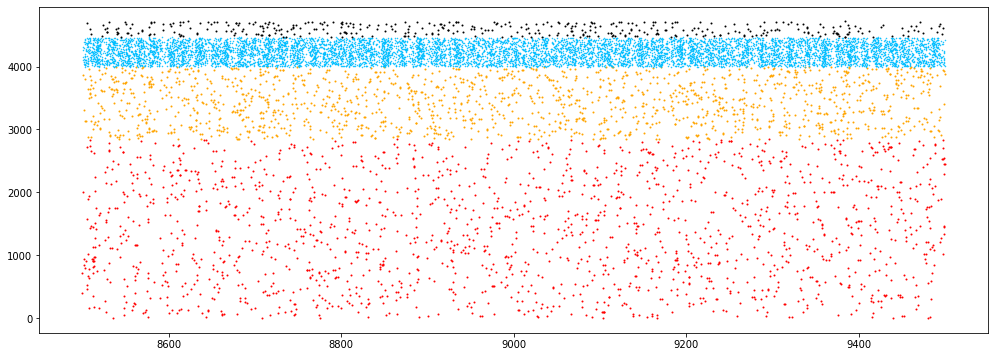

In [41]:
ts = f['spikes']['BLA']['timestamps'][:]
nids = f['spikes']['BLA']['node_ids'][:]

plt.figure(figsize=(17,6))
plt.plot(ts[(ts>8500)&(ts<9500)&(nids>0)&(nids<=2844)], 
         nids[(ts>8500)&(ts<9500)&(nids>0)&(nids<=2844)], 'r.', markersize=2)

plt.plot(ts[(ts>8500)&(ts<9500)&(nids>2844)&(nids<=3999)], 
         nids[(ts>8500)&(ts<9500)&(nids>2844)&(nids<=3999)], '.', color='orange', markersize=2)

plt.plot(ts[(ts>8500)&(ts<9500)&(nids>3999)&(nids<=4465)], 
         nids[(ts>8500)&(ts<9500)&(nids>3999)&(nids<=4465)], '.', color='deepskyblue', markersize=1)

plt.plot(ts[(ts>8500)&(ts<9500)&(nids>4465)&(nids<=4721)], 
         nids[(ts>8500)&(ts<9500)&(nids>4465)&(nids<=4721)], '.', color='k', markersize=2)

plt.savefig('spikeraster.pdf')

In [295]:
from bmtk.utils.reports.compartment import CompartmentReport

spikes_b = h5py.File('./baseline/spikes.h5','r')
spikes_50p = h5py.File('./50p_NMDA_block/spikes.h5','r')

ts = spikes_b['spikes']['BLA']['timestamps'][:]
nids = spikes_b['spikes']['BLA']['node_ids'][:]

r1_baseline_NMDA = CompartmentReport('./baseline/PN2PV_i_NMDA.h5')
r2_baseline_NMDA = CompartmentReport('./baseline/tone2PV_i_NMDA.h5')
#r3_baseline_NMDA = CompartmentReport('./baseline/BG2PN_i_NMDA.h5')

mem_pot = CompartmentReport('./baseline/v_report.h5')

r1_baseline_AMPA = CompartmentReport('./baseline/PN2PV_i_AMPA.h5')
r2_baseline_AMPA = CompartmentReport('./baseline/tone2PV_i_AMPA.h5')
#r3_baseline_AMPA = CompartmentReport('./baseline/BG2PN_i_AMPA.h5')

L_NMDA = []; L_AMPA = []; L_v = []
for n in np.arange(4001,4041):
    print(n)
    node_id = n

    #mem_pot_b = mem_pot.data(node_id=node_id,time_window=(5000,15000))

    r1_b = r1_baseline_NMDA.data(node_id=node_id,time_window=(5000,7000))
    r2_b = r1_baseline_NMDA.data(node_id=node_id,time_window=(5000,7000))
    r3_b = r1_baseline_NMDA.data(node_id=node_id,time_window=(5000,7000))

    i_NMDA = np.sum(np.concatenate((r1_b,r2_b), axis=1),axis=1)
    
    r1_b = r1_baseline_AMPA.data(node_id=node_id,time_window=(5000,7000))
    r2_b = r1_baseline_AMPA.data(node_id=node_id,time_window=(5000,7000))
    r3_b = r1_baseline_AMPA.data(node_id=node_id,time_window=(5000,7000))

    i_AMPA = np.sum(np.concatenate((r1_b,r2_b), axis=1),axis=1)
    
    v = mem_pot.data(node_id=node_id,time_window=(5000,7000))

    #r1_50pb = r1_50p.data(node_id=node_id,time_window=(5000,15000))
    #r2_50pb = r2_50p.data(node_id=node_id,time_window=(5000,15000))
    #r3_50pb = r3_50p.data(node_id=node_id,time_window=(5000,15000))

    #i_NMDA_50p = np.sum(np.concatenate((r1_50pb,r2_50pb,r3_50pb), axis=1),axis=1)
    #mem_pot_50p = r4_50p.data(node_id=node_id,time_window=(5000,15000))

    ts_1 = ts[(nids==n) & (ts>5000) & (ts<7000)] - 5000
    
    S_NMDA = np.zeros((ts_1.shape[0],1000))
    S_AMPA = np.zeros((ts_1.shape[0],1000))
    S_v = np.zeros((ts_1.shape[0],1000))
    
    for i,s in enumerate(ts_1):
        if i_NMDA[int(s*10-500):int(s*10+500)].shape[0]==1000:
            S_NMDA[i,:] = i_NMDA[int(s*10-500):int(s*10+500)]
            S_AMPA[i,:] = i_AMPA[int(s*10-500):int(s*10+500)]
            S_v[i,:] = v[int(s*10-500):int(s*10+500),0]
            
    L_NMDA.append(S_NMDA)
    L_AMPA.append(S_AMPA)
    L_v.append(S_v)

4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040


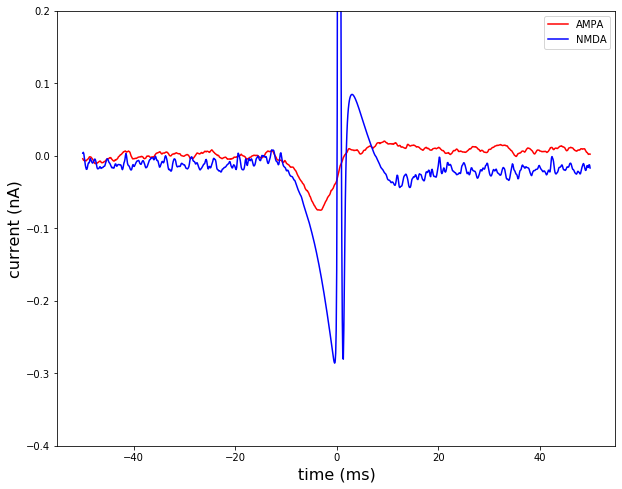

In [308]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(-50,50,0.1),np.mean(np.concatenate(L_AMPA),axis=0)+0.19,color='r',label='AMPA')
plt.plot(np.arange(-50,50,0.1),np.mean(np.concatenate(L_NMDA),axis=0)+0.23,color='b',label='NMDA')
plt.ylim(-0.4,0.2)
#plt.vlines(0,-0.5,0.5)
#plt.twinx()
#plt.plot(np.arange(-50,50,0.1),np.mean(np.concatenate(L_v),axis=0),color='k')
plt.xlabel('time (ms)', fontsize=16)
plt.ylabel('current (nA)', fontsize=16)
plt.legend()
plt.savefig('STA_PV.pdf')

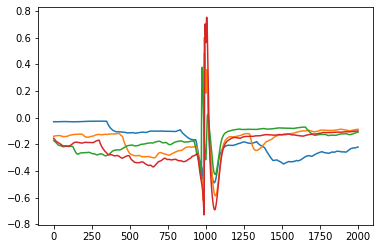

In [173]:
for i in np.arange(0,S.shape[0]):
    plt.plot(S[i,:])

In [270]:
r1_100p = r1_100p.data(node_id=node_id,time_window=(5000,15000))
r2_100p = r2_100p.data(node_id=node_id,time_window=(5000,15000))
r3_100p = r3_100p.data(node_id=node_id,time_window=(5000,15000))

i_NMDA_100p = np.sum(np.concatenate((r1_100p,r2_100p,r3_100p), axis=1),axis=1)
mem_pot_100p = r4_100p.data(node_id=node_id,time_window=(5000,15000))

(47000, 57000)

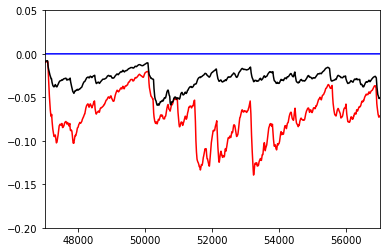

In [271]:
plt.plot(i_NMDA_b,color='r')
plt.plot(i_NMDA_50p,color='k')
plt.plot(i_NMDA_100p,color='b')
plt.ylim(-0.2,0.05)
#plt.twinx()
#plt.plot(mem_pot,color='k')
plt.xlim(47000,57000)
#plt.savefig('PV_mempot.pdf')

# Firing rate comparisons NMDA block

In [69]:
f = h5py.File('./baseline/spikes.h5','r')
g = h5py.File('./50p_NMDA_block/spikes.h5','r')
h = h5py.File('./100p_NMDA_block/spikes.h5','r')

In [70]:
PNA = [0,2844]
PNC = [2845, 3999]
PV = [4000, 4465]
SOM = [4466, 4721]

ts = f['spikes']['BLA']['timestamps'][:]
nids = f['spikes']['BLA']['node_ids'][:]

df_baseline = pd.DataFrame(data=np.concatenate((ts[(ts>1000)].reshape(-1,1), nids[(ts>1000)].reshape(-1,1)),axis=1), 
                           columns=['timestamps','node_ids'])
df_baseline['type'] = 'PNA'
df_baseline.loc[(df_baseline['node_ids']>=PNC[0]) & 
                (df_baseline['node_ids']<=PNC[1]), 'type'] = 'PNC'
df_baseline.loc[(df_baseline['node_ids']>=PV[0]) & 
                (df_baseline['node_ids']<=PV[1]), 'type'] = 'PV'
df_baseline.loc[(df_baseline['node_ids']>=SOM[0]) & 
                (df_baseline['node_ids']<=SOM[1]), 'type'] = 'SOM'

(1000, 1100)

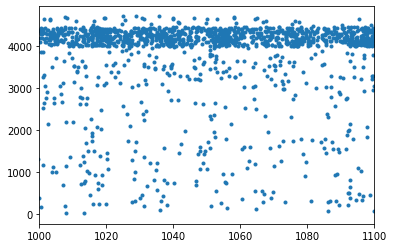

In [5]:
plt.plot(ts,nids,'.')
plt.xlim(1000,1100)

In [6]:
ts = g['spikes']['BLA']['timestamps'][:]
nids = g['spikes']['BLA']['node_ids'][:]

df_50p = pd.DataFrame(data=np.concatenate((ts[(ts>1000)].reshape(-1,1), nids[(ts>1000)].reshape(-1,1)),axis=1), 
                           columns=['timestamps','node_ids'])
df_50p['type'] = 'PNA'
df_50p.loc[(df_50p['node_ids']>=PNC[0]) & 
                (df_50p['node_ids']<=PNC[1]), 'type'] = 'PNC'
df_50p.loc[(df_50p['node_ids']>=PV[0]) & 
                (df_50p['node_ids']<=PV[1]), 'type'] = 'PV'
df_50p.loc[(df_50p['node_ids']>=SOM[0]) & 
                (df_50p['node_ids']<=SOM[1]), 'type'] = 'SOM'

(1000, 1100)

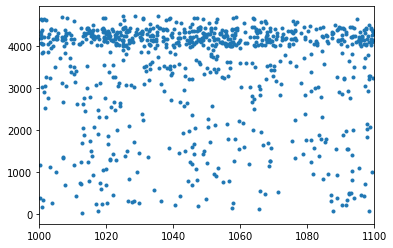

In [7]:
plt.plot(ts,nids,'.')
plt.xlim(1000,1100)

In [8]:
ts = h['spikes']['BLA']['timestamps'][:]
nids = h['spikes']['BLA']['node_ids'][:]

df_100p = pd.DataFrame(data=np.concatenate((ts[(ts>1000)].reshape(-1,1), nids[(ts>1000)].reshape(-1,1)),axis=1), 
                           columns=['timestamps','node_ids'])
df_100p['type'] = 'PNA'
df_100p.loc[(df_100p['node_ids']>=PNC[0]) & 
                (df_100p['node_ids']<=PNC[1]), 'type'] = 'PNC'
df_100p.loc[(df_100p['node_ids']>=PV[0]) & 
                (df_100p['node_ids']<=PV[1]), 'type'] = 'PV'
df_100p.loc[(df_100p['node_ids']>=SOM[0]) & 
                (df_100p['node_ids']<=SOM[1]), 'type'] = 'SOM'

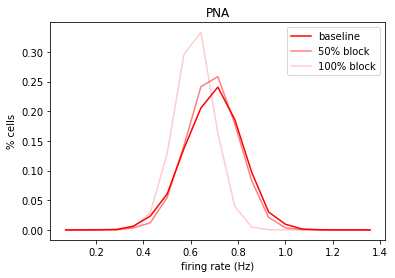

In [22]:
plt.title('PNA')
#plt.subplot(3,1,1)
n,b = np.histogram(df_baseline[df_baseline.type=='PNA'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,20,1))
plt.plot(b[1:]/14,n/np.sum(n),label='baseline',color='r')

#plt.subplot(3,1,2)
n,b = np.histogram(df_50p[df_50p.type=='PNA'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,20,1))
plt.plot(b[1:]/14,n/np.sum(n),label='50% block',color='r', alpha=0.5)

#plt.subplot(3,1,3)
n,b = np.histogram(df_100p[df_100p.type=='PNA'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,20,1))
plt.plot(b[1:]/14,n/np.sum(n),label='100% block',color='r', alpha=0.2)

plt.legend()

plt.xlabel('firing rate (Hz)')
plt.ylabel('% cells')
plt.savefig('PNA_blockade_FR.pdf')

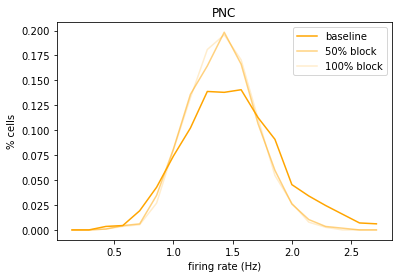

In [23]:
plt.title('PNC')
#plt.subplot(3,1,1)
n,b = np.histogram(df_baseline[df_baseline.type=='PNC'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,40,2))
plt.plot(b[1:]/14,n/np.sum(n),label='baseline',color='orange')

#plt.subplot(3,1,2)
n,b = np.histogram(df_50p[df_50p.type=='PNC'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,40,2))
plt.plot(b[1:]/14,n/np.sum(n),label='50% block',color='orange',alpha=0.5)

#plt.subplot(3,1,3)
n,b = np.histogram(df_100p[df_100p.type=='PNC'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,40,2))
plt.plot(b[1:]/14,n/np.sum(n),label='100% block',color='orange',alpha=0.2)

plt.legend()

plt.xlabel('firing rate (Hz)')
plt.ylabel('% cells')
plt.savefig('PNC_blockade_FR.pdf')

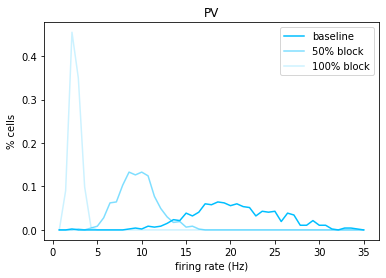

In [24]:
plt.title('PV')
#plt.subplot(3,1,1)
n,b = np.histogram(df_baseline[df_baseline.type=='PV'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,500,10))
plt.plot(b[1:]/14,n/np.sum(n),label='baseline',color='deepskyblue')

#plt.subplot(3,1,2)
n,b = np.histogram(df_50p[df_50p.type=='PV'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,500,10))
plt.plot(b[1:]/14,n/np.sum(n),label='50% block',color='deepskyblue',alpha=0.5)

#plt.subplot(3,1,3)
n,b = np.histogram(df_100p[df_100p.type=='PV'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,500,10))
plt.plot(b[1:]/14,n/np.sum(n),label='100% block',color='deepskyblue',alpha=0.2)

plt.legend()

plt.xlabel('firing rate (Hz)')
plt.ylabel('% cells')
plt.savefig('PV_blockade_FR.pdf')

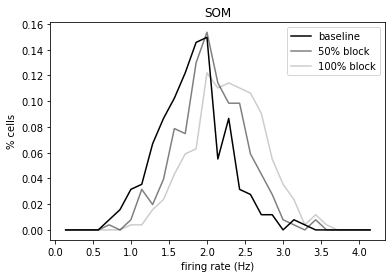

In [26]:
plt.title('SOM')
#plt.subplot(3,1,1)
n,b = np.histogram(df_baseline[df_baseline.type=='SOM'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,60,2))
plt.plot(b[1:]/14,n/np.sum(n),label='baseline', color='k')

#plt.subplot(3,1,2)
n,b = np.histogram(df_50p[df_50p.type=='SOM'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,60,2))
plt.plot(b[1:]/14,n/np.sum(n),label='50% block', color='k', alpha=0.5)

#plt.subplot(3,1,3)
n,b = np.histogram(df_100p[df_100p.type=='SOM'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,60,2))
plt.plot(b[1:]/14,n/np.sum(n),label='100% block', color='k', alpha=0.2)

plt.legend()

plt.xlabel('firing rate (Hz)')
plt.ylabel('% cells')
plt.savefig('SOM_blockade_FR.pdf')

In [265]:
butter_bandpass_filter(data = f['ecp']['data'][:,0], lowcut = 30, highcut = 80, fs=10000).shape

(150000,)

(-1, 1)

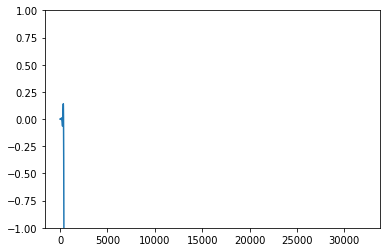

In [264]:
plt.plot(butter_bandpass_filter(data = f['ecp']['data'][:,0], lowcut = 30, highcut = 80, fs=10000))
plt.ylim(-1,1)

In [186]:
f = h5py.File('./baseline/ecp.h5','r')
g = h5py.File('./50p_NMDA_block/ecp.h5','r')
h = h5py.File('./100p_NMDA_block/ecp.h5','r')

KeyError: "Unable to open object (object 'ecp' doesn't exist)"

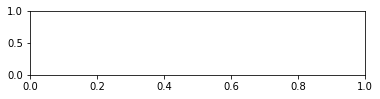

In [105]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

plt.subplot(3,1,1)
plt.plot(zscore(f['ecp']['data'][:,0]))
plt.xlim(88000,90000)
plt.subplot(3,1,2)
plt.plot(zscore(g['ecp']['data'][:,0]))
plt.xlim(88000,90000)
plt.subplot(3,1,3)
plt.plot(zscore(h['ecp']['data'][:,0]))
plt.xlim(88000,90000)
plt.savefig('sampleLFP.pdf')

In [107]:
from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

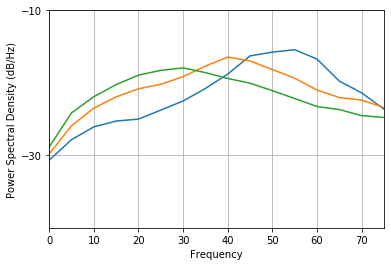

In [252]:
plt.psd(butter_lowpass_filter(zscore(f['ecp']['data'][10000:,0][::10]), cutoff=200, fs=1000), Fs = 1000, NFFT = 200)
plt.psd(butter_lowpass_filter(zscore(g['ecp']['data'][10000:,0][::10]), cutoff=200, fs=1000), Fs = 1000, NFFT = 200)
plt.psd(butter_lowpass_filter(zscore(h['ecp']['data'][10000:,0][::10]), cutoff=200, fs=1000), Fs = 1000, NFFT = 200)
plt.ylim(-40,-10)
plt.xlim(0,75)
plt.savefig('PSD_blockade.pdf')
plt.show()


In [118]:
report1 = CompartmentReport('./baseline/PN2PV_i_AMPA.h5')
report2 = CompartmentReport('./baseline/tone2PV_i_AMPA.h5')

r1 = report1.data(node_id=4000,time_window=(5000,15000))
r2 = report2.data(node_id=4000,time_window=(5000,15000))

i_AMPA = np.sum(np.concatenate((r1,r2), axis=1),axis=1)

report1 = CompartmentReport('./baseline/PN2PV_i_NMDA.h5')
report2 = CompartmentReport('./baseline/tone2PV_i_NMDA.h5')

r1 = report1.data(node_id=4000,time_window=(5000,15000))
r2 = report2.data(node_id=4000,time_window=(5000,15000))

i_NMDA = np.sum(np.concatenate((r1,r2), axis=1),axis=1)

(20000, 21000)

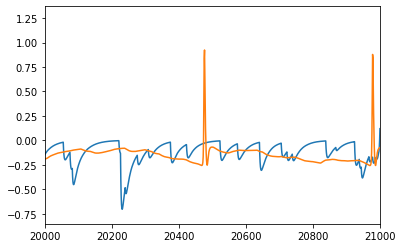

In [119]:
plt.plot(i_AMPA)
plt.plot(i_NMDA)
plt.xlim(20000,21000)

In [280]:
# NMDA current of high and low firing cells

In [284]:
np.quantile(df_baseline[df_baseline.type=='PV'].groupby('node_ids')['timestamps'].count().values,
            [0.25,0.5,0.75])

array([236., 279., 330.])

In [85]:
c = df_baseline[df_baseline.type=='PV'].groupby('node_ids')['timestamps'].count()
highFR_PVs = c[c>=330].index.tolist()
lowFR_PVs = c[c<=236].index.tolist()

In [264]:
from bmtk.utils.reports.compartment import CompartmentReport

report1 = CompartmentReport('./baseline/PN2PV_i_AMPA.h5')
report2 = CompartmentReport('./baseline/tone2PV_i_AMPA.h5')
#report3 = CompartmentReport('./baseline/BG2PN_i_NMDA.h5')
report4 = CompartmentReport('./baseline/v_report.h5')

L = []; L_rand = []
for node_id in np.intersect1d(lowFR_PVs,np.arange(4000,4041)).astype(int):
    #print(node_id)

    r1 = report1.data(node_id=node_id,time_window=(5000,15000))
    r2 = report2.data(node_id=node_id,time_window=(5000,15000))
    #r3 = report3.data(node_id=node_id,time_window=(5000,15000))

    i_AMPA = np.sum(np.concatenate((r1,r2), axis=1),axis=1)

    inds = (ts[(nids==node_id)&(ts>5000)]*10).astype(int)-50050

    for i in inds:
        t1 = i-20
        t2 = i
        
        rand = np.random.choice(np.arange(0,100000))
        t1_rand = rand-20
        t2_rand = rand
        #plt.plot(np.arange(t1,t2),i_NMDA[t1:t2],color='k')
        L.append(np.abs(np.sum(i_AMPA[t1:t2])/20))
       
        L_rand.append(np.abs(np.sum(i_AMPA[t1_rand:t2_rand])/20))
    
#mem_pot = report4.data(node_id=node_id,time_window=(5000,15000))

In [265]:
np.save('lowFR_PV_ampa.pkl', L)

In [266]:
highFR_PV_NMDA = np.load('highFR_PV_ampa.pkl.npy')
lowFR_PV_NMDA = np.load('lowFR_PV_ampa.pkl.npy')

In [267]:
high = np.concatenate((np.tile('high',highFR_PV_NMDA.shape[0]).reshape(-1,1), highFR_PV_NMDA.reshape(-1,1)), axis=1)
low = np.concatenate((np.tile('low',lowFR_PV_NMDA.shape[0]).reshape(-1,1), lowFR_PV_NMDA.reshape(-1,1)), axis=1)

df = pd.DataFrame(data = np.concatenate((high,low),axis=0), columns=['type','value'])
df['value'] = df['value'].astype(float)

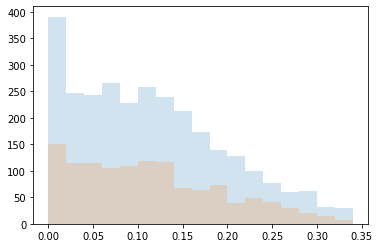

In [270]:
plt.hist(highFR_PV_NMDA,bins=np.arange(0,0.36,0.02),alpha=0.2)
plt.hist(lowFR_PV_NMDA,bins=np.arange(0,0.36,0.02),alpha=0.2)
plt.savefig('highlowPVAMPAhist.pdf')

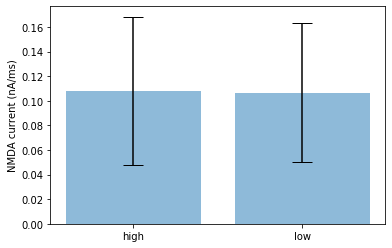

In [271]:
fig, ax = plt.subplots()
err = (df.groupby('type')['value'].quantile(0.5) - df.groupby('type')['value'].quantile(0.25)).values
ax.bar(['high','low'], 
       df.groupby('type')['value'].median(), 
       yerr=err,
       align='center', 
       alpha=0.5, 
       ecolor='black', 
       capsize=10)
plt.ylabel('NMDA current (nA/ms)')
plt.savefig('highlowPVAMPAbar.pdf')
#sns.swarmplot(x="type", y="value", data=df, color="0", alpha=.35)

In [178]:
from scipy.stats import ttest_ind

ttest_ind(df[df.type=='high']['value'], df[df.type=='low']['value'])

Ttest_indResult(statistic=-0.5040843210954011, pvalue=0.6142283712640683)

In [27]:
np.quantile(df_baseline[df_baseline.type=='PNA'].groupby('node_ids')['timestamps'].count().values,
            [0.25,0.5,0.75])

array([ 8.,  9., 10.])

In [5]:
c = df_baseline[df_baseline.type=='PNA'].groupby('node_ids')['timestamps'].count()
highFR_PNAs = c[c>=10].index.tolist()
lowFR_PNAs = c[c<=8].index.tolist()

In [7]:
from bmtk.utils.reports.compartment import CompartmentReport

report1 = CompartmentReport('./baseline/PN2PN_i_NMDA.h5')
report2 = CompartmentReport('./baseline/tone2PN_i_NMDA.h5')
report3 = CompartmentReport('./baseline/BG2PN_i_NMDA.h5')
report4 = CompartmentReport('./baseline/v_report.h5')

L = []; L_rand = [];
for node_id in np.intersect1d(lowFR_PNAs,np.arange(1,41)).astype(int):
    #print(node_id)

    r1 = report1.data(node_id=node_id,time_window=(1000,15000))
    r2 = report2.data(node_id=node_id,time_window=(1000,15000))
    r3 = report3.data(node_id=node_id,time_window=(1000,15000))

    i_NMDA = np.sum(np.concatenate((r1,r2,r3), axis=1),axis=1)
    
    L_overall.append(np.mean(i_NMDA))
    
    inds = (ts[(nids==node_id)&(ts>1000)]*10).astype(int)-10000

    for i in inds:
        t1 = i-20
        t2 = i
        
        rand = np.random.choice(np.arange(0,100000))
        t1_rand = rand-20
        t2_rand = rand
        #plt.plot(np.arange(t1,t2),i_NMDA[t1:t2],color='k')
        L.append(np.abs(np.sum(i_NMDA[t1:t2])/20))
       
        L_rand.append(np.abs(np.sum(i_NMDA[t1_rand:t2_rand])/20))
    
#mem_pot = report4.data(node_id=node_id,time_window=(5000,15000))

In [245]:
np.save('lowFR_PNA_ampa.pkl', L)

In [246]:
highFR_PNA_NMDA = np.load('highFR_PNA_ampa.pkl.npy')
lowFR_PNA_NMDA = np.load('lowFR_PNA_ampa.pkl.npy')

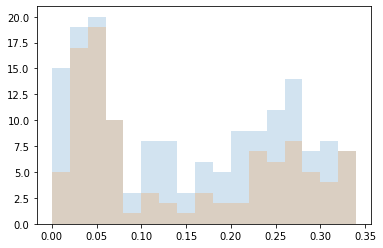

In [247]:
plt.hist(highFR_PNA_NMDA[highFR_PNA_NMDA>0.01],bins=np.arange(0,0.36,0.02),alpha=0.2)
plt.hist(lowFR_PNA_NMDA[lowFR_PNA_NMDA>0.01],bins=np.arange(0,0.36,0.02),alpha=0.2)
plt.savefig('highlowPNAAMPAhist.pdf')

In [248]:
high = np.concatenate((np.tile('high',highFR_PNA_NMDA.shape[0]).reshape(-1,1), highFR_PNA_NMDA.reshape(-1,1)), axis=1)
low = np.concatenate((np.tile('low',lowFR_PNA_NMDA.shape[0]).reshape(-1,1), lowFR_PNA_NMDA.reshape(-1,1)), axis=1)

df = pd.DataFrame(data = np.concatenate((high,low),axis=0), columns=['type','value'])
df['value'] = df['value'].astype(float)

df = df[df.value>0.01]

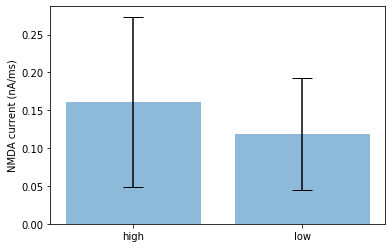

In [249]:
fig, ax = plt.subplots()
err = (df.groupby('type')['value'].quantile(0.5) - df.groupby('type')['value'].quantile(0.25)).values
ax.bar(['high','low'], 
       df.groupby('type')['value'].median(), 
       yerr=err,
       align='center', 
       alpha=0.5, 
       ecolor='black', 
       capsize=10)
plt.ylabel('NMDA current (nA/ms)')
plt.savefig('highlowPNAAMPAbar.pdf')
#sns.swarmplot(x="type", y="value", data=df, color="0", alpha=.35)

In [250]:
from scipy.stats import ttest_ind

ttest_ind(df[df.type=='high']['value'], df[df.type=='low']['value'])

Ttest_indResult(statistic=0.9850775500724845, pvalue=0.3254425310374701)

In [181]:
df_baseline[df_baseline.type=='PNC'].groupby('node_ids')['timestamps'].count().values.mean()-\
df_baseline[df_baseline.type=='PNC'].groupby('node_ids')['timestamps'].count().values.std()

13.520428178205439

In [60]:
np.quantile(df_baseline[df_baseline.type=='PNC'].groupby('node_ids')['timestamps'].count().values,
            [0.25,0.5,0.75])

array([16., 19., 23.])

In [197]:
c = df_baseline[df_baseline.type=='PNC'].groupby('node_ids')['timestamps'].count()
highFR_PNCs = c[c>23].index.tolist()
lowFR_PNCs = c[c<16].index.tolist()

In [198]:
len(highFR_PNCs)

266

In [199]:
len(lowFR_PNCs)

282

In [253]:
from bmtk.utils.reports.compartment import CompartmentReport

report1 = CompartmentReport('./baseline/PN2PN_i_AMPA.h5')
report2 = CompartmentReport('./baseline/tone2PN_i_AMPA.h5')
report3 = CompartmentReport('./baseline/BG2PN_i_AMPA.h5')
report4 = CompartmentReport('./baseline/v_report.h5')

L = []; L_rand = []
for node_id in np.intersect1d(lowFR_PNCs,np.arange(3001,3041)).astype(int):
    #print(node_id)

    r1 = report1.data(node_id=node_id,time_window=(1000,15000))
    r2 = report2.data(node_id=node_id,time_window=(1000,15000))
    r3 = report3.data(node_id=node_id,time_window=(1000,15000))

    i_NMDA = np.sum(np.concatenate((r1,r2,r3), axis=1),axis=1)

    inds = (ts[(nids==node_id)&(ts>5000)]*10).astype(int)-10000

    for i in inds:
        t1 = i-20
        t2 = i
        
        rand = np.random.choice(np.arange(0,100000))
        t1_rand = rand-20
        t2_rand = rand
        #plt.plot(np.arange(t1,t2),i_NMDA[t1:t2],color='k')
        L.append(np.abs(np.sum(i_NMDA[t1:t2])/20))
       
        L_rand.append(np.abs(np.sum(i_NMDA[t1_rand:t2_rand])/20))
    
#mem_pot = report4.data(node_id=node_id,time_window=(5000,15000))

In [254]:
np.save('lowFR_PNC_ampa.pkl', L)

In [255]:
highFR_PNC_NMDA = np.load('highFR_PNC_ampa.pkl.npy')
lowFR_PNC_NMDA = np.load('lowFR_PNC_ampa.pkl.npy')

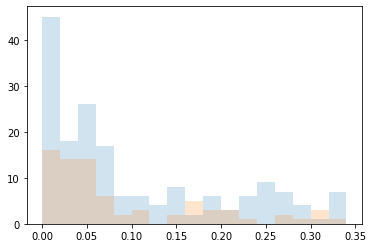

In [260]:
plt.hist(highFR_PNC_NMDA,bins=np.arange(0,0.36,0.02),alpha=0.2)
plt.hist(lowFR_PNC_NMDA,bins=np.arange(0,0.36,0.02),alpha=0.2)
plt.savefig('highlowPNCAMPAhist.pdf')

In [261]:
high = np.concatenate((np.tile('high',highFR_PNC_NMDA.shape[0]).reshape(-1,1), highFR_PNC_NMDA.reshape(-1,1)), axis=1)
low = np.concatenate((np.tile('low',lowFR_PNC_NMDA.shape[0]).reshape(-1,1), lowFR_PNC_NMDA.reshape(-1,1)), axis=1)

df = pd.DataFrame(data = np.concatenate((high,low),axis=0), columns=['type','value'])
df['value'] = df['value'].astype(float)

df = df[df.value>0.01]

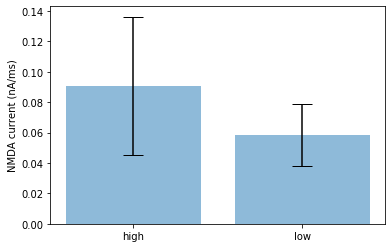

In [262]:
fig, ax = plt.subplots()
err = (df.groupby('type')['value'].quantile(0.5) - df.groupby('type')['value'].quantile(0.25)).values
ax.bar(['high','low'], 
       df.groupby('type')['value'].median(), 
       yerr=err,
       align='center', 
       alpha=0.5, 
       ecolor='black', 
       capsize=10)
plt.ylabel('NMDA current (nA/ms)')
plt.savefig('highlowPNCAMPAbar.pdf')
#sns.swarmplot(x="type", y="value", data=df, color="0", alpha=.35)

In [263]:
from scipy.stats import ttest_ind

ttest_ind(df[df.type=='high']['value'], df[df.type=='low']['value'])

Ttest_indResult(statistic=2.156563475378044, pvalue=0.032124131805491535)

In [114]:
# Overall mean NMDA
from bmtk.utils.reports.compartment import CompartmentReport

report1 = CompartmentReport('./baseline/PN2PN_i_NMDA.h5')
report2 = CompartmentReport('./baseline/tone2PN_i_NMDA.h5')
report3 = CompartmentReport('./baseline/BG2PN_i_NMDA.h5')
report4 = CompartmentReport('./baseline/v_report.h5')

L = []; L_ma = [];
for node_id in np.arange(1,41).astype(int):
    #print(node_id)

    r1 = report1.data(node_id=node_id,time_window=(1000,15000))
    r2 = report2.data(node_id=node_id,time_window=(1000,15000))
    r3 = report3.data(node_id=node_id,time_window=(1000,15000))

    i_NMDA = np.sum(np.concatenate((r1,r2,r3), axis=1),axis=1)
    
    L.append(np.mean(i_NMDA))
    #np.mean([1000:2000])
    L_ma.append(np.mean(i_NMDA.reshape(-1,10000),axis=1))
    
    inds = (ts[(nids==node_id)&(ts>1000)]*10).astype(int)-10000
    
#mem_pot = report4.data(node_id=node_id,time_window=(5000,15000))

# STA 

In [98]:
PNA_AMPA = np.load('STA_AMPA_PNA_mean.npy')
PNA_NMDA = np.load('STA_NMDA_PNA_mean.npy')

PNC_AMPA = np.load('STA_AMPA_PNC_mean.npy')
PNC_NMDA = np.load('STA_NMDA_PNC_mean.npy')

PV_AMPA = np.load('STA_AMPA_PV_mean.npy')
PV_NMDA = np.load('STA_NMDA_PV_mean.npy')

In [99]:
PV_AMPA.shape

(40, 500)

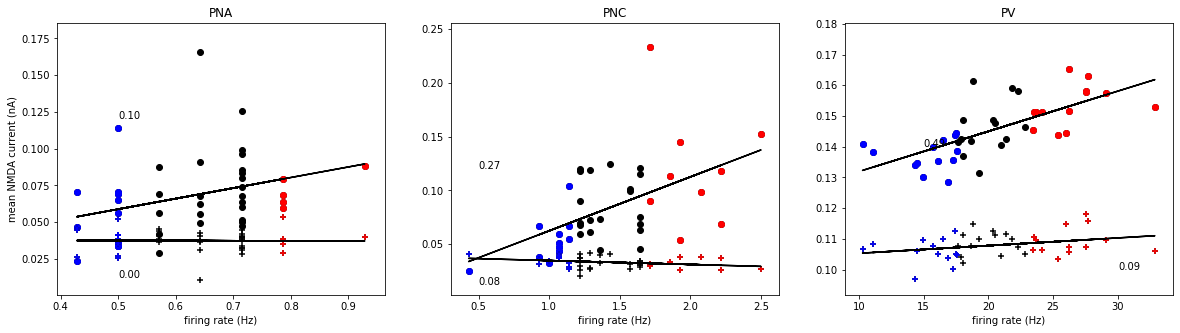

In [101]:
plt.figure(figsize=(20,5))
##############################
plt.subplot(1,3,1)
FR = (df_baseline[(df_baseline.type=='PNA') & 
                                      (df_baseline.node_ids>0) & 
                                      (df_baseline.node_ids<41)].groupby('node_ids')['timestamps'].count()/14).reset_index()
FR['NMDA'] = np.mean(PNA_NMDA[:,:-750], axis=1)
FR['AMPA'] = np.mean(PNA_AMPA[:,:-750], axis=1)

plt.scatter(FR['timestamps'], np.abs(FR['NMDA']), color='k')

plt.scatter(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['timestamps'],
            np.abs(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['NMDA']),
            color='b')

plt.scatter(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['timestamps'],
            np.abs(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['NMDA']),
            color='r')

plt.scatter(FR['timestamps'], np.abs(FR['AMPA']), color='k', marker = '+')

plt.scatter(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['timestamps'],
            np.abs(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['AMPA']),
            color='b', marker='+')

plt.scatter(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['timestamps'],
            np.abs(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['AMPA']),
            color='r', marker='+')
a, b = np.polyfit(FR['timestamps'], np.abs(FR['AMPA']), 1)

plt.plot(FR['timestamps'], a*FR['timestamps']+b,color='k')
plt.text(0.5,.012,'{0:.2f}'.format(r2_score(np.abs(FR['AMPA']), a*FR['timestamps']+b)))

a, b = np.polyfit(FR['timestamps'], np.abs(FR['NMDA']), 1)
plt.plot(FR['timestamps'], a*FR['timestamps']+b,color='k')
plt.text(0.5,.12,'{0:.2f}'.format(r2_score(np.abs(FR['NMDA']), a*FR['timestamps']+b)))

plt.ylabel('mean NMDA current (nA)')
plt.xlabel('firing rate (Hz)')
plt.title('PNA')
################################
plt.subplot(1,3,2)
FR = (df_baseline[(df_baseline.type=='PNC') & 
                                      (df_baseline.node_ids>3000) & 
                                      (df_baseline.node_ids<3041)].groupby('node_ids')['timestamps'].count()/14).reset_index()
FR['NMDA'] = np.mean(PNC_NMDA[:,:-750], axis=1)
FR['AMPA'] = np.mean(PNC_AMPA[:,:-750], axis=1)

plt.scatter(FR['timestamps'], np.abs(FR['NMDA']), color='k')

plt.scatter(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['timestamps'],
            np.abs(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['NMDA']),
            color='b')

plt.scatter(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['timestamps'],
            np.abs(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['NMDA']),
            color='r')

plt.scatter(FR['timestamps'], np.abs(FR['AMPA']), color='k', marker = '+')

plt.scatter(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['timestamps'],
            np.abs(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['AMPA']),
            color='b', marker='+')

plt.scatter(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['timestamps'],
            np.abs(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['AMPA']),
            color='r', marker='+')
a, b = np.polyfit(FR['timestamps'], np.abs(FR['AMPA']), 1)

plt.plot(FR['timestamps'], a*FR['timestamps']+b,color='k')
plt.text(0.5,.012,'{0:.2f}'.format(r2_score(np.abs(FR['AMPA']), a*FR['timestamps']+b)))

a, b = np.polyfit(FR['timestamps'], np.abs(FR['NMDA']), 1)
plt.plot(FR['timestamps'], a*FR['timestamps']+b,color='k')
plt.text(0.5,.12,'{0:.2f}'.format(r2_score(np.abs(FR['NMDA']), a*FR['timestamps']+b)))

plt.xlabel('firing rate (Hz)')
plt.title('PNC')
################################

plt.subplot(1,3,3)
FR = (df_baseline[(df_baseline.type=='PV') & 
                                      (df_baseline.node_ids>4000) & 
                                      (df_baseline.node_ids<4041)].groupby('node_ids')['timestamps'].count()/14).reset_index()
FR['NMDA'] = np.mean(PV_NMDA[:,:-250], axis=1)
FR['AMPA'] = np.mean(PV_AMPA[:,:-250], axis=1)

plt.scatter(FR['timestamps'], np.abs(FR['NMDA']), color='k')

plt.scatter(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['timestamps'],
            np.abs(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['NMDA']),
            color='b')

plt.scatter(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['timestamps'],
            np.abs(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['NMDA']),
            color='r')

plt.scatter(FR['timestamps'], np.abs(FR['AMPA']), color='k', marker = '+')

plt.scatter(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['timestamps'],
            np.abs(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['AMPA']),
            color='b', marker='+')

plt.scatter(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['timestamps'],
            np.abs(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['AMPA']),
            color='r', marker='+')
a, b = np.polyfit(FR['timestamps'], np.abs(FR['AMPA']), 1)

plt.plot(FR['timestamps'], a*FR['timestamps']+b,color='k')
plt.text(30,.10,'{0:.2f}'.format(r2_score(np.abs(FR['AMPA']), a*FR['timestamps']+b)))

a, b = np.polyfit(FR['timestamps'], np.abs(FR['NMDA']), 1)
plt.plot(FR['timestamps'], a*FR['timestamps']+b,color='k')
plt.text(15,.14,'{0:.2f}'.format(r2_score(np.abs(FR['NMDA']), a*FR['timestamps']+b)))

plt.xlabel('firing rate (Hz)')
plt.title('PV')
plt.savefig('NMDAscatter.pdf')

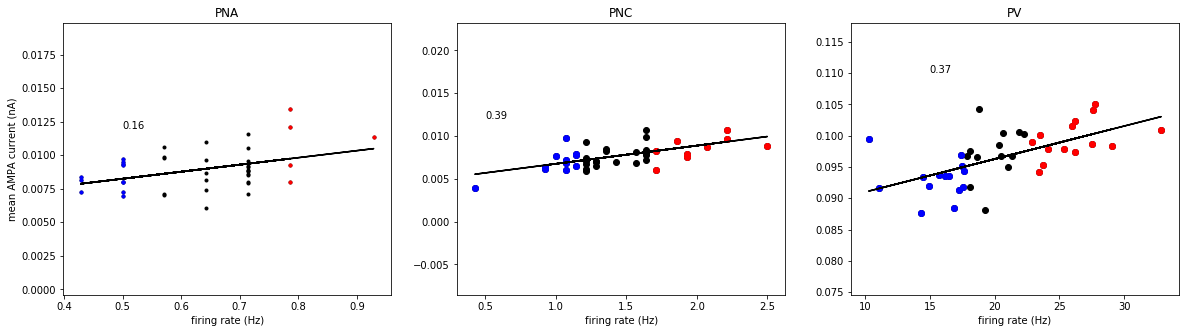

In [216]:
from sklearn.metrics import r2_score

plt.figure(figsize=(20,5))
##############################
plt.subplot(1,3,1)
FR = (df_baseline[(df_baseline.type=='PNA') & 
                                      (df_baseline.node_ids>0) & 
                                      (df_baseline.node_ids<41)].groupby('node_ids')['timestamps'].count()/14).reset_index()
FR['AMPA'] = PNA_AMPA

plt.scatter(FR['timestamps'], np.abs(FR['AMPA']), color='k', marker = '.')

plt.scatter(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['timestamps'],
            np.abs(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['AMPA']),
            color='b', marker='.')

plt.scatter(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['timestamps'],
            np.abs(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['AMPA']),
            color='r', marker='.')

a, b = np.polyfit(FR['timestamps'], np.abs(FR['AMPA']), 1)
plt.plot(FR['timestamps'], a*FR['timestamps']+b,color='k')
plt.text(0.5,.012,'{0:.2f}'.format(r2_score(np.abs(FR['AMPA']), a*FR['timestamps']+b)))

plt.ylabel('mean AMPA current (nA)')
plt.xlabel('firing rate (Hz)')
plt.title('PNA')
################################
plt.subplot(1,3,2)
FR = (df_baseline[(df_baseline.type=='PNC') & 
                                      (df_baseline.node_ids>3000) & 
                                      (df_baseline.node_ids<3041)].groupby('node_ids')['timestamps'].count()/14).reset_index()
FR['AMPA'] = PNC_AMPA

plt.scatter(FR['timestamps'], np.abs(FR['AMPA']), color='k')

plt.scatter(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['timestamps'],
            np.abs(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['AMPA']),
            color='b')

plt.scatter(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['timestamps'],
            np.abs(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['AMPA']),
            color='r')

a, b = np.polyfit(FR['timestamps'], np.abs(FR['AMPA']), 1)
plt.plot(FR['timestamps'], a*FR['timestamps']+b,color='k')
plt.text(0.5,.012,'{0:.2f}'.format(r2_score(np.abs(FR['AMPA']), a*FR['timestamps']+b)))

plt.xlabel('firing rate (Hz)')
plt.title('PNC')
################################

plt.subplot(1,3,3)
FR = (df_baseline[(df_baseline.type=='PV') & 
                                      (df_baseline.node_ids>=4000) & 
                                      (df_baseline.node_ids<4041)].groupby('node_ids')['timestamps'].count()/14).reset_index()
FR['AMPA'] = PV_AMPA

plt.scatter(FR['timestamps'], np.abs(FR['AMPA']), color='k')

plt.scatter(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['timestamps'],
            np.abs(FR[FR.timestamps<np.quantile(FR.timestamps, [0.33,0.67])[0]]['AMPA']),
            color='b')

plt.scatter(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['timestamps'],
            np.abs(FR[FR.timestamps>np.quantile(FR.timestamps, [0.33,0.67])[1]]['AMPA']),
            color='r')

a, b = np.polyfit(FR['timestamps'], np.abs(FR['AMPA']), 1)
plt.plot(FR['timestamps'], a*FR['timestamps']+b,color='k')
plt.text(15,.11,'{0:.2f}'.format(r2_score(np.abs(FR['AMPA']), a*FR['timestamps']+b)))

plt.xlabel('firing rate (Hz)')
plt.title('PV')
plt.savefig('AMPAscatter.pdf')